In [47]:
import pandas as pd 

# !pip install PyPortfolioOpt
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns


In [8]:
# data: 
folder = 'data'
xls_dict  = pd.read_excel(folder + '/trading-game-data-20102023.xlsx', sheet_name=None)

In [10]:
sheet_names = list(xls_dict.keys())
sp500_names = xls_dict['info']['Ticker'].unique()

print(sheet_names)

['__FDSCACHE__', 'README', 'info', 'index-price', 'price', 'size', 'price-to-book', 'turnover']


In [24]:
index_price_df = xls_dict['index-price']
price_df = xls_dict['price']
size_df = xls_dict['size']
price_to_book_df = xls_dict['price-to-book']
turnover_df = xls_dict['turnover']

## Markowitz Portfolio Theory

In [64]:
price_df = xls_dict['price'].reset_index()
price_df['Date'] = pd.to_datetime(price_df['Date'])
price_df.set_index('Date', inplace=True)
daily_returns = price_df.pct_change()
expected_returns = daily_returns.mean()
risk = daily_returns.std()

risk.sort_values()

WMT      0.008431
KO       0.008471
MCD      0.008852
BRK.B    0.008859
PG       0.009301
           ...   
KEY      0.036913
SEDG     0.038979
CMA      0.040414
CTLT     0.041364
ZION     0.041840
Length: 500, dtype: float64

## CAPM model
- Time horizon is the full dataframe

In [83]:
index_price_df = xls_dict['index-price'].reset_index()
index_price_df['Date'] = pd.to_datetime(index_price_df['Date'])
index_price_df.set_index('Date', inplace=True)
sp_500_daily_returns = index_price_df['S&P 500'].pct_change()

daily_returns_with_sp500 = daily_returns.copy()
daily_returns_with_sp500['SP500'] = sp_500_daily_returns
cov_matrix_with_sp500 = daily_returns_with_sp500.cov()
market_var = sp_500_daily_returns.var()  
beta = cov_matrix_with_sp500['SP500'] / market_var
beta

A        0.912992
AAL      1.348263
AAPL     1.150799
ABBV     0.130669
ABNB     1.690057
           ...   
ZBH      0.571193
ZBRA     1.702181
ZION     2.221824
ZTS      0.977542
SP500    1.000000
Name: SP500, Length: 501, dtype: float64

In [89]:
b = 1
utility_scores = expected_returns - 0.5 * b * risk**2
utility_scores

A      -0.001557
AAL    -0.000684
AAPL    0.001414
ABBV   -0.000495
ABNB    0.001528
          ...   
YUM    -0.000325
ZBH    -0.000981
ZBRA   -0.001108
ZION   -0.002423
ZTS     0.000648
Length: 500, dtype: float64

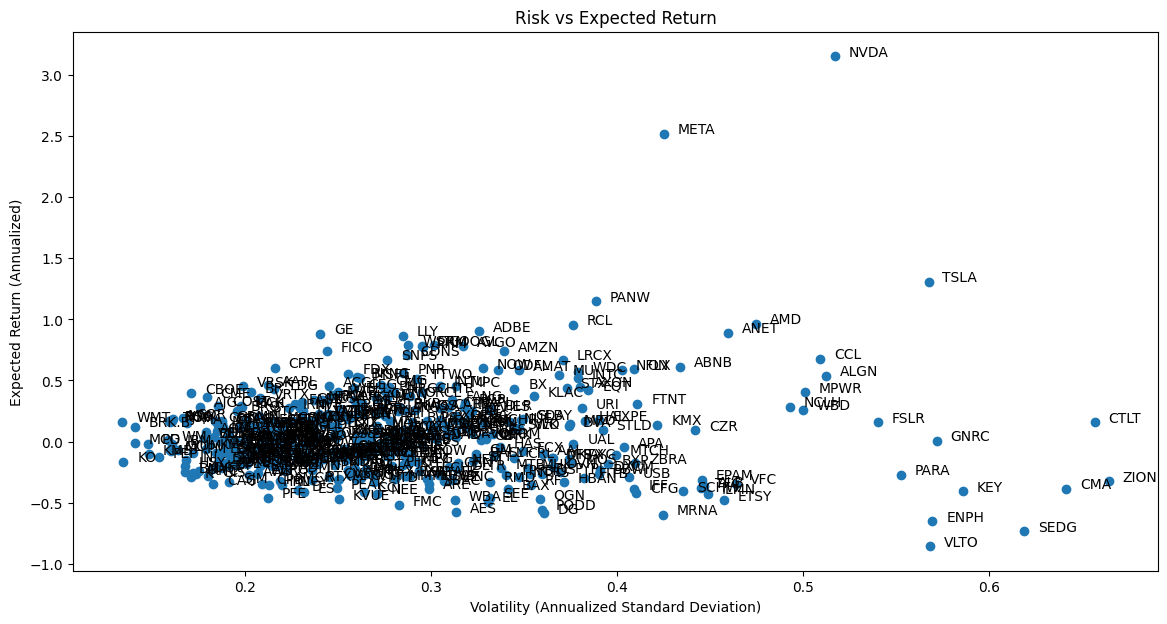

In [94]:
average_daily_returns = daily_returns.mean()
expected_return = (1 + average_daily_returns) ** 252 - 1
daily_volatility = daily_returns.std()
annual_volatility = daily_volatility * (252 ** 0.5)
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

for i, txt in enumerate(daily_returns.columns):
    plt.annotate(txt, (annual_volatility[i], expected_return[i]), xytext=(10,0), textcoords='offset points')
    
plt.scatter(annual_volatility, expected_return, marker='o')

plt.title('Risk vs Expected Return')
plt.xlabel('Volatility (Annualized Standard Deviation)')
plt.ylabel('Expected Return (Annualized)')

plt.show()